# Customer Segmentation 

### 1. Data Processing

In [511]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler


from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors

from collections import Counter
from kneed import KneeLocator
from datetime import datetime



import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [512]:
path = ".\\customer_segmentation.csv"
df = pd.read_csv(path)

In [513]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [514]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [515]:
# Ajouter les colonnes directement au DataFrame d'origine
df.loc[:, 'Total_Kids'] = df['Kidhome'] + df['Teenhome']
df.loc[:, 'Age'] = datetime.now().year - df['Year_Birth']

In [516]:
df.drop(columns=['Kidhome', 'Teenhome', 'Year_Birth', 'ID',
                   'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Dt_Customer', 'Recency', 'NumDealsPurchases', 
                   'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                   'NumCatalogPurchases', 'Marital_Status'], inplace=True)

In [517]:
df.head()

Education   Income  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  Graduation  58138.0       635         88              546              172   
1  Graduation  46344.0        11          1                6                2   
2  Graduation  71613.0       426         49              127              111   
3  Graduation  26646.0        11          4               20               10   
4         PhD  58293.0       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumWebPurchases  NumStorePurchases  \
0                88            88                8                  4   
1                 1             6                1                  2   
2                21            42                8                 10   
3                 3             5                2                  4   
4                27            15                5                  6   

   NumWebVisitsMonth  Total_Kids  Age  
0                  7           0   67  
1                  5           2   70  
2                  4           0   59  
3                  6           1   40  
4                  5           1   43

In [518]:
df.shape

(2240, 13)

In [519]:
valeurs_uniques_par_colonne = df.nunique()
print(valeurs_uniques_par_colonne)

Education               5
Income               1974
MntWines              776
MntFruits             158
MntMeatProducts       558
MntFishProducts       182
MntSweetProducts      177
MntGoldProds          213
NumWebPurchases        15
NumStorePurchases      14
NumWebVisitsMonth      16
Total_Kids              4
Age                    59
dtype: int64


In [520]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2240 non-null   object 
 1   Income             2216 non-null   float64
 2   MntWines           2240 non-null   int64  
 3   MntFruits          2240 non-null   int64  
 4   MntMeatProducts    2240 non-null   int64  
 5   MntFishProducts    2240 non-null   int64  
 6   MntSweetProducts   2240 non-null   int64  
 7   MntGoldProds       2240 non-null   int64  
 8   NumWebPurchases    2240 non-null   int64  
 9   NumStorePurchases  2240 non-null   int64  
 10  NumWebVisitsMonth  2240 non-null   int64  
 11  Total_Kids         2240 non-null   int64  
 12  Age                2240 non-null   int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 227.6+ KB
None


In [521]:
df.isna().sum()

Education             0
Income               24
MntWines              0
MntFruits             0
MntMeatProducts       0
MntFishProducts       0
MntSweetProducts      0
MntGoldProds          0
NumWebPurchases       0
NumStorePurchases     0
NumWebVisitsMonth     0
Total_Kids            0
Age                   0
dtype: int64

In [522]:
df.describe()

Income     MntWines    MntFruits  MntMeatProducts  \
count    2216.000000  2240.000000  2240.000000      2240.000000   
mean    52247.251354   303.935714    26.302232       166.950000   
std     25173.076661   336.597393    39.773434       225.715373   
min      1730.000000     0.000000     0.000000         0.000000   
25%     35303.000000    23.750000     1.000000        16.000000   
50%     51381.500000   173.500000     8.000000        67.000000   
75%     68522.000000   504.250000    33.000000       232.000000   
max    666666.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumWebPurchases  \
count      2240.000000       2240.000000   2240.000000      2240.000000   
mean         37.525446         27.062946     44.021875         4.084821   
std          54.628979         41.280498     52.167439         2.778714   
min           0.000000          0.000000      0.000000         0.000000   
25%           3.000000          1.000000      9.000000         2.000000   
50%          12.000000          8.000000     24.000000         4.000000   
75%          50.000000         33.000000     56.000000         6.000000   
max         259.000000        263.000000    362.000000        27.000000   

       NumStorePurchases  NumWebVisitsMonth   Total_Kids          Age  
count        2240.000000        2240.000000  2240.000000  2240.000000  
mean            5.790179           5.316518     0.950446    55.194196  
std             3.250958           2.426645     0.751803    11.984069  
min             0.000000           0.000000     0.000000    28.000000  
25%             3.000000           3.000000     0.000000    47.000000  
50%             5.000000           6.000000     1.000000    54.000000  
75%             8.000000           7.000000     1.000000    65.000000  
max            13.000000          20.000000     3.000000   131.000000

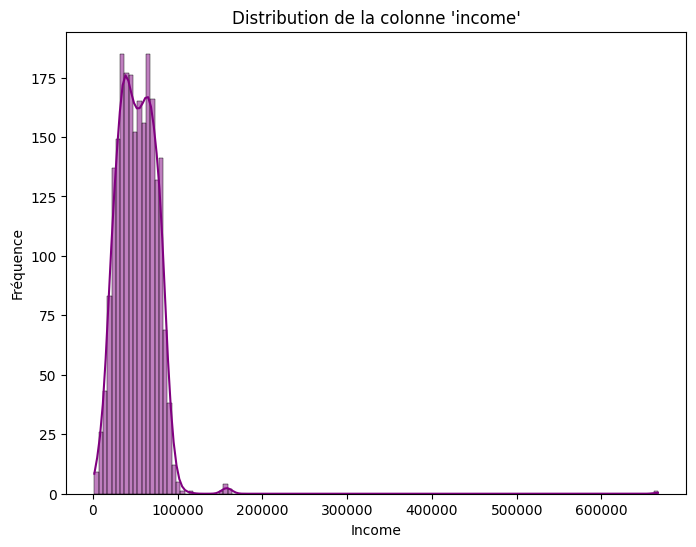

In [523]:
# Affichez un histogramme pour voir la distribution de Income
plt.figure(figsize=(8, 6))
sns.histplot(df['Income'].dropna(), kde=True, color = 'purple')
plt.title("Distribution de la colonne 'income'")
plt.xlabel("Income")
plt.ylabel("Fréquence")
plt.show()

In [524]:
# Calculer la médiane de la colonne income
median_income = df['Income'].median()

# Remplir les valeurs manquantes avec la médiane (la médiane n'est pas sensible aux outliers)
df['Income'].fillna(median_income, inplace=True)

In [525]:
df.isna().sum()

Education            0
Income               0
MntWines             0
MntFruits            0
MntMeatProducts      0
MntFishProducts      0
MntSweetProducts     0
MntGoldProds         0
NumWebPurchases      0
NumStorePurchases    0
NumWebVisitsMonth    0
Total_Kids           0
Age                  0
dtype: int64

In [526]:
clients_salaire_600000 = df[df['Income'] > 600000]

nombre_clients = len(clients_salaire_600000)

print(f"Nombre de clients avec un salaire supérieur à 600 000 : {nombre_clients}")

Nombre de clients avec un salaire supérieur à 600 000 : 1


In [527]:
df = df[df['Income'] <= 600000]

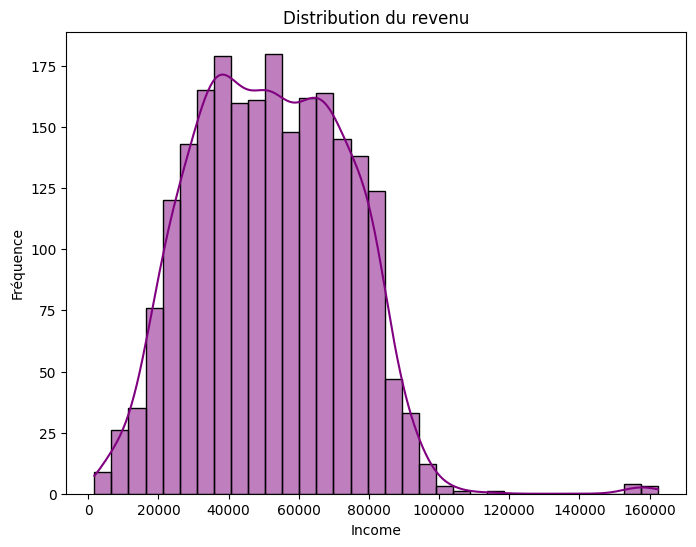

In [528]:
# Affichez un histogramme pour voir la distribution de Income
plt.figure(figsize=(8, 6))
sns.histplot(df['Income'].dropna(), kde=True, color = 'purple')
plt.title("Distribution du revenu")
plt.xlabel("Income")
plt.ylabel("Fréquence")
plt.show()

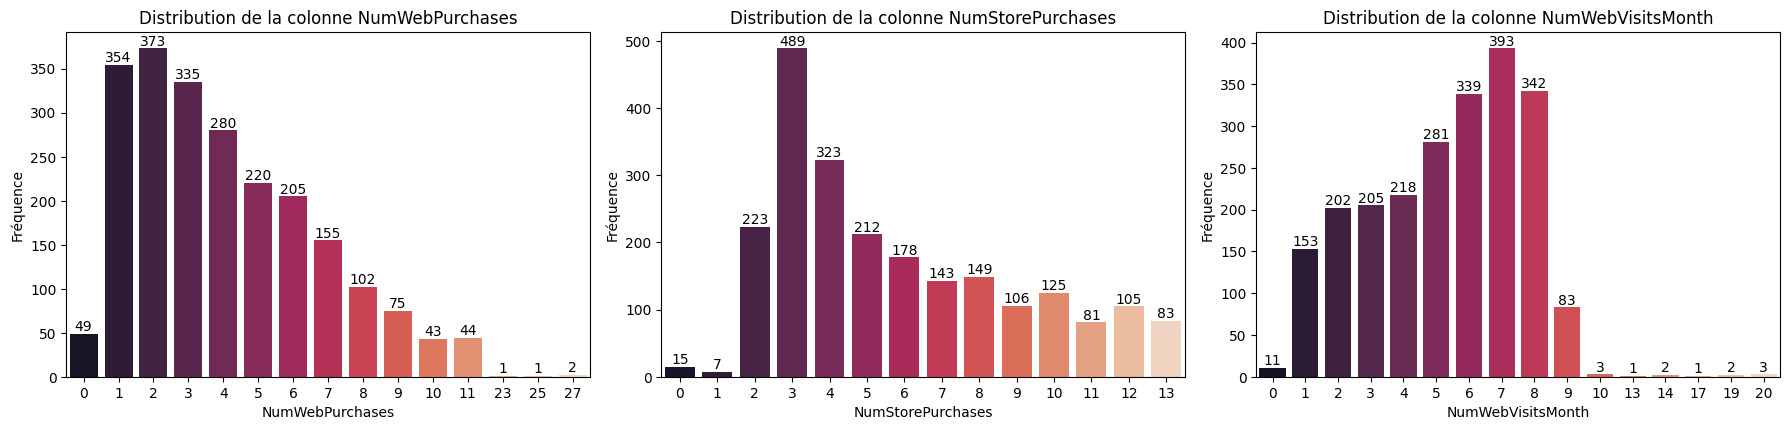

In [529]:
columns = ['NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
# Create a figure for subplots
plt.figure(figsize=(18, 8))

# Loop through each product column and create a histogram with KDE
for i, column in enumerate(columns, 1):
    plt.subplot(2, 3, i)

    graph = sns.countplot(data=df, x=df[column], palette=sns.color_palette("rocket", n_colors=len(df[column].unique())))
    plt.title(f"Distribution de la colonne {column}")
    plt.xlabel(column)
    plt.ylabel("Fréquence")

    # Ajouter les valeurs de compte sur les barres
    for container in graph.containers:
        graph.bar_label(container)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the figure with all subplots
plt.show()

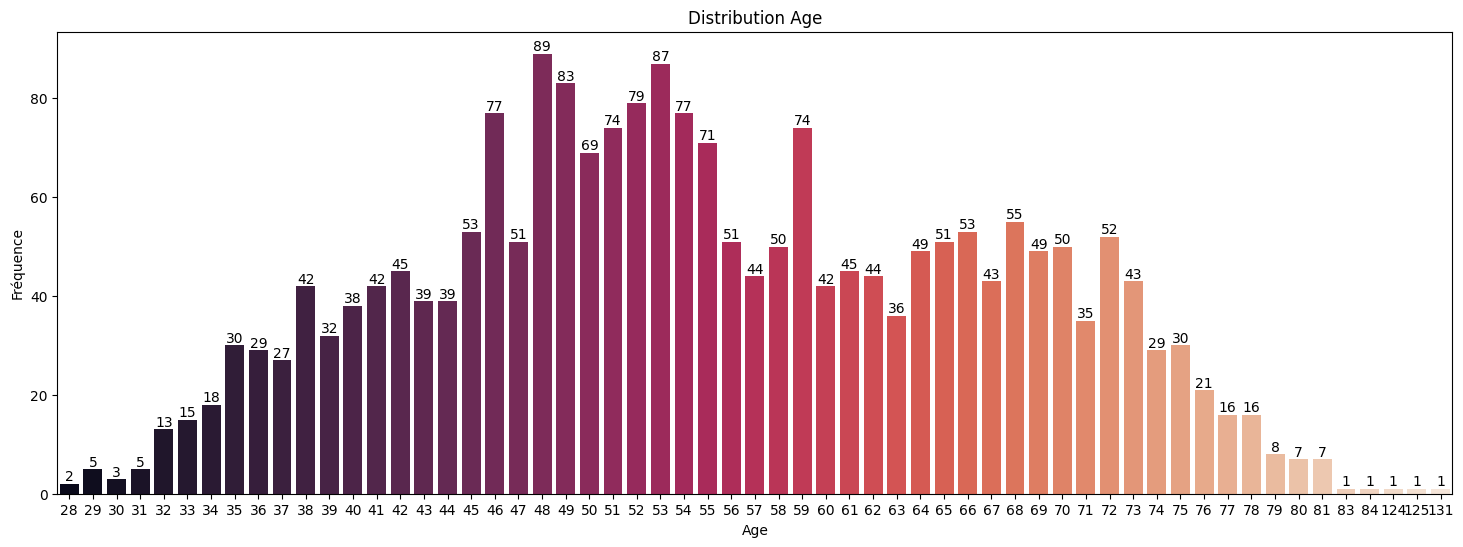

In [530]:
plt.figure(figsize=[18,6])
graph = sns.countplot(data=df , x= df['Age'] , palette=sns.color_palette("rocket", n_colors=len(df['Age'].unique())), hue=None)
for container in graph.containers:
    graph.bar_label(container)
plt.title('Distribution Age')
plt.xlabel('Age')
plt.ylabel('Fréquence')
plt.show()

In [531]:
df = df[~df['Age'].isin([124, 125, 131])]

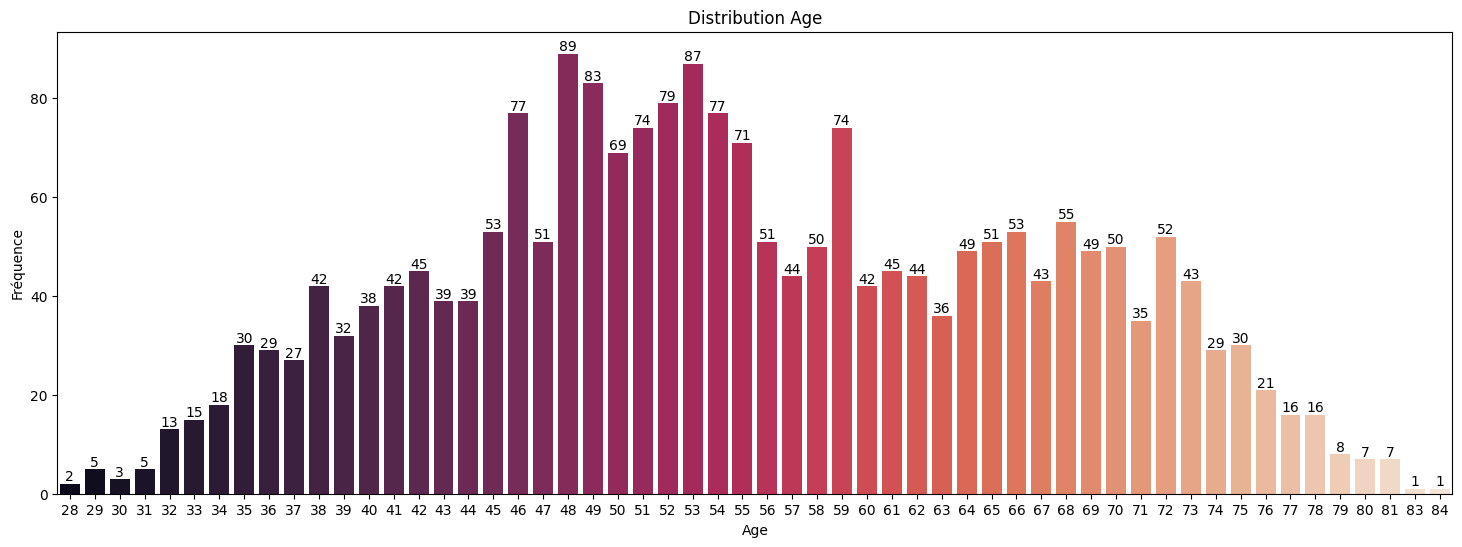

In [532]:
plt.figure(figsize=[18,6])
graph = sns.countplot(data=df , x= df['Age'] , palette=sns.color_palette("rocket", n_colors=len(df['Age'].unique())), hue=None)
for container in graph.containers:
    graph.bar_label(container)
plt.title('Distribution Age')
plt.xlabel('Age')
plt.ylabel('Fréquence')
plt.show()

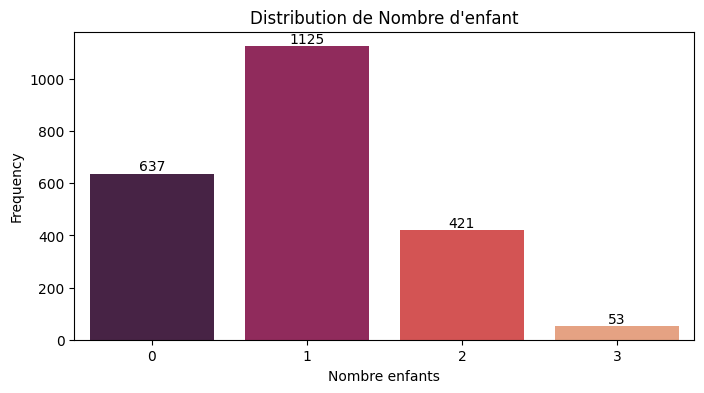

In [533]:
plt.figure(figsize=[8,4])
graph = sns.countplot(data=df , x= df['Total_Kids'] , palette=sns.color_palette("rocket", n_colors=len(df['Total_Kids'].unique())), hue=None)
for container in graph.containers:
    graph.bar_label(container)
plt.title('Distribution de Nombre d\'enfant')
plt.xlabel('Nombre enfants')
plt.ylabel('Frequency')
plt.show()

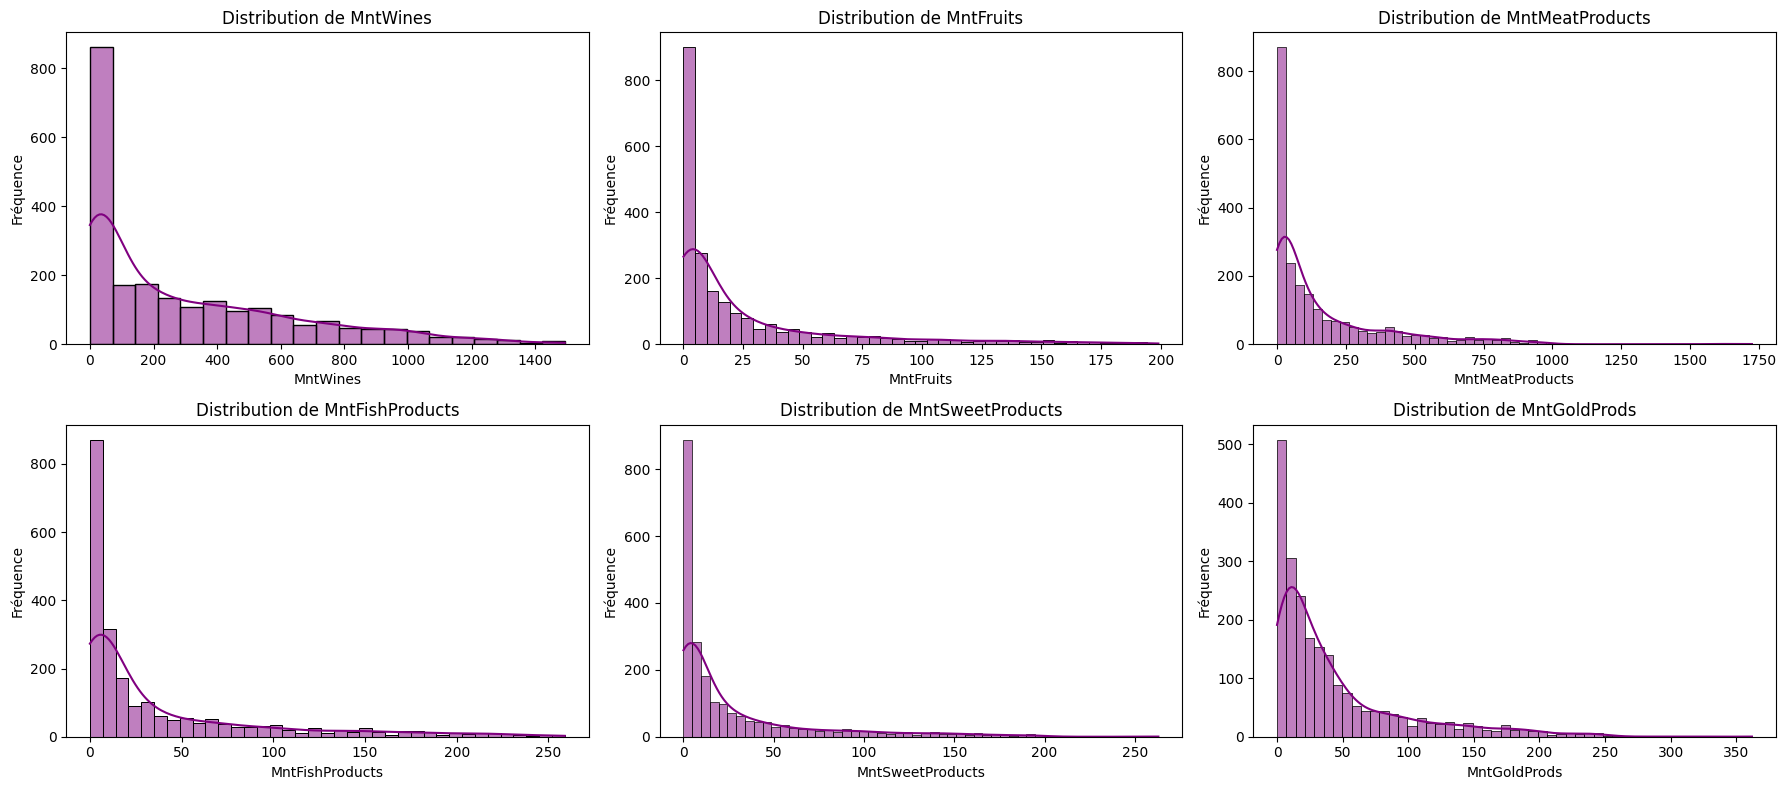

In [534]:
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Create a figure for subplots
plt.figure(figsize=(18, 8))

# Loop through each product column and create a histogram with KDE
for i, product in enumerate(product_columns, 1):
    plt.subplot(2, 3, i)

    sns.histplot(df[product], kde=True, color='purple')
    plt.title(f"Distribution de {product}")
    plt.xlabel(product)
    plt.ylabel("Fréquence")

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the figure with all subplots
plt.show()

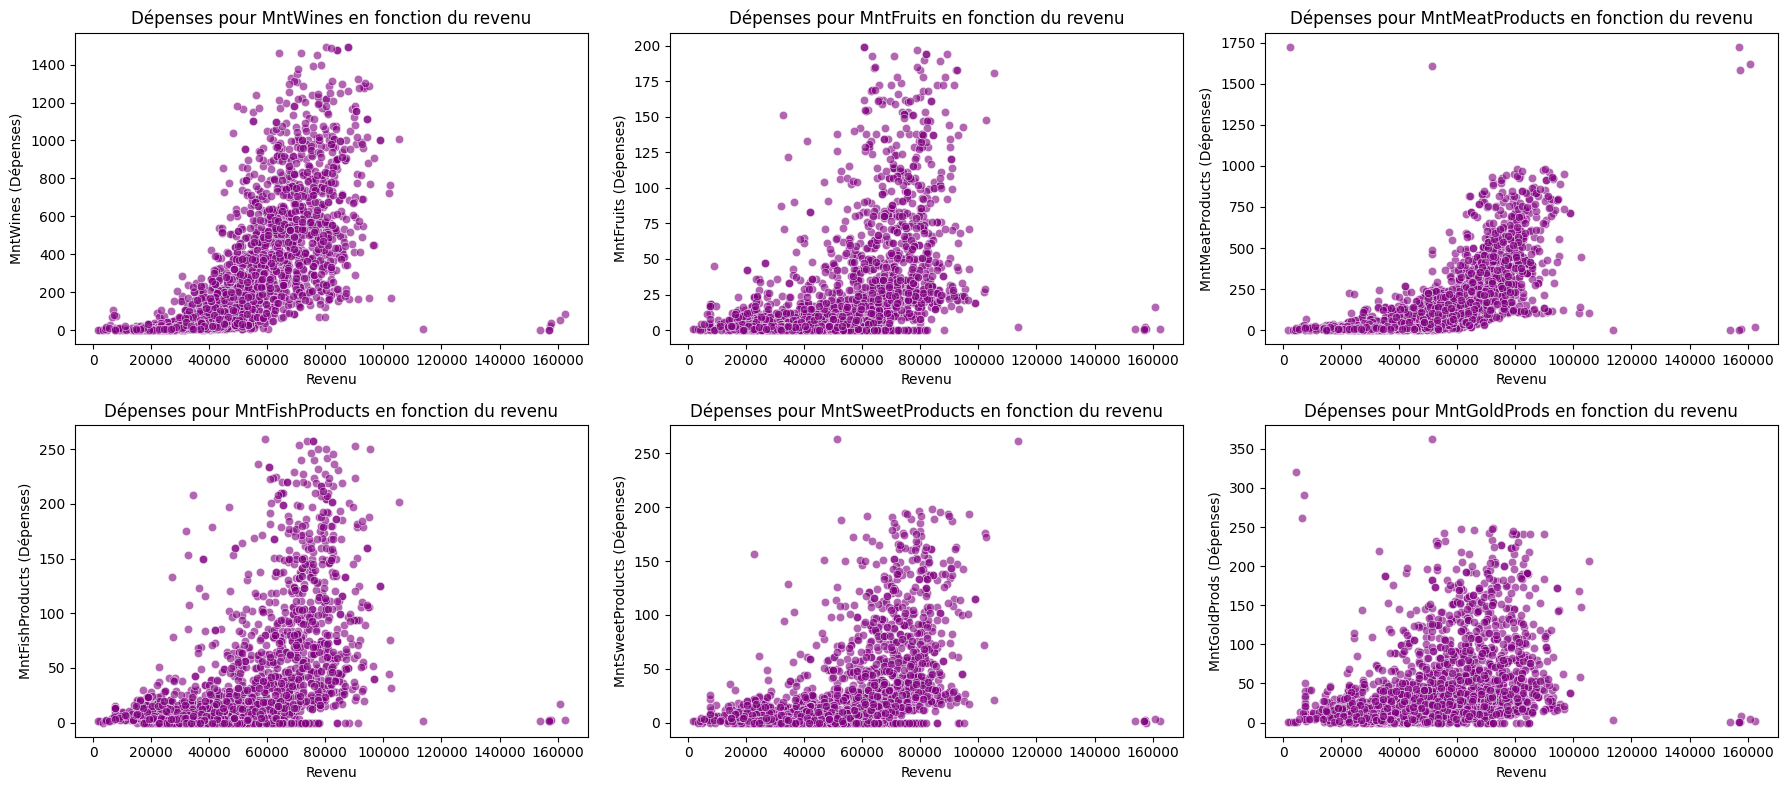

In [535]:
# Créer une figure pour afficher les scatter plots pour chaque produit
plt.figure(figsize=(18, 8))

# Boucle sur chaque colonne de produits pour créer un scatter plot
for i, product in enumerate(product_columns, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df, x='Income', y=product, color="purple", alpha=0.6)
    plt.title(f'Dépenses pour {product} en fonction du revenu')
    plt.xlabel('Revenu')
    plt.ylabel(f'{product} (Dépenses)')

plt.tight_layout()
plt.show()

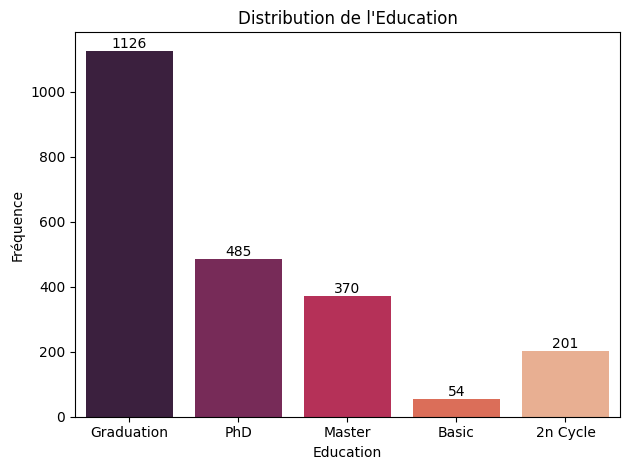

In [536]:
#Educations Distribution
graph = sns.countplot(data=df, x='Education',  palette=sns.color_palette("rocket", n_colors=len(df['Education'].unique())))

plt.title('Distribution de l\'Education')
plt.xlabel('Education')
plt.ylabel('Fréquence')
for container in graph.containers:
    graph.bar_label(container)
plt.tight_layout()  
plt.show()

In [537]:
label_encoder = LabelEncoder()
df['Education'] = label_encoder.fit_transform(df['Education'])

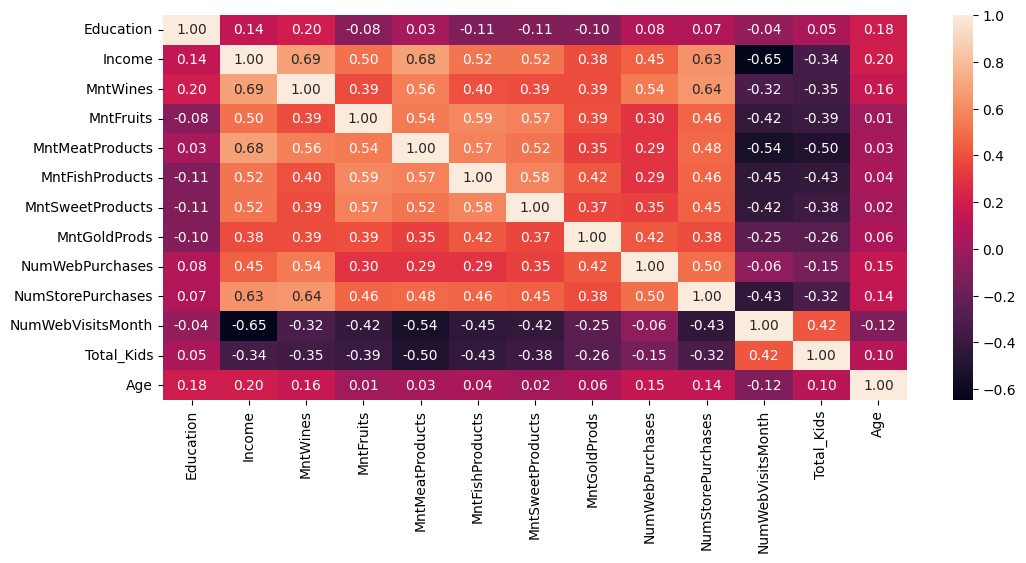

In [538]:
correlation_matrix = df.corr()
plt.figure(figsize=[12, 5])

sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap=sns.color_palette("rocket", as_cmap=True) )
plt.show()

In [539]:
data = df.copy()
scaler = StandardScaler()
scaler.fit(data)
data_scaled = pd.DataFrame(scaler.transform(data), columns= data.columns)
data_scaled.head()

Education    Income  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  -0.352133  0.288947  0.983228   1.554170         1.679746         2.461068   
1  -0.352133 -0.262003 -0.871064  -0.636431        -0.713455        -0.650414   
2  -0.352133  0.918423  0.362159   0.572177        -0.177201         1.344595   
3  -0.352133 -1.182183 -0.871064  -0.560893        -0.651409        -0.503991   
4   1.429245  0.296187 -0.389661   0.421101        -0.217088         0.154911   

   MntSweetProducts  MntGoldProds  NumWebPurchases  NumStorePurchases  \
0          1.475396      0.845669         1.407639          -0.552429   
1         -0.631638     -0.729742        -1.110921          -1.167738   
2         -0.147262     -0.038098         1.407639           1.293496   
3         -0.583200     -0.748954        -0.751127          -0.552429   
4         -0.001950     -0.556831         0.328256           0.062879   

   NumWebVisitsMonth  Total_Kids       Age  
0           0.692865   -1.264308  1.016868  
1          -0.131421    1.395139  1.273264  
2          -0.543564   -1.264308  0.333146  
3           0.280722    0.065416 -1.290693  
4          -0.131421    0.065416 -1.034298

### PCA: Technique de réduction de dimensionnalité linéaire

In [540]:
# Réduction de dimension avec PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# 3. Convertir en DataFrame
df_pca = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(2)])
df_pca.describe()

PC1           PC2
count  2.236000e+03  2.236000e+03
mean  -4.131062e-17  3.177740e-17
std    2.339389e+00  1.235817e+00
min   -4.939855e+00 -3.336769e+00
25%   -2.132479e+00 -8.618558e-01
50%   -5.922113e-01 -5.546759e-03
75%    2.041525e+00  8.552945e-01
max    6.594594e+00  3.804811e+00

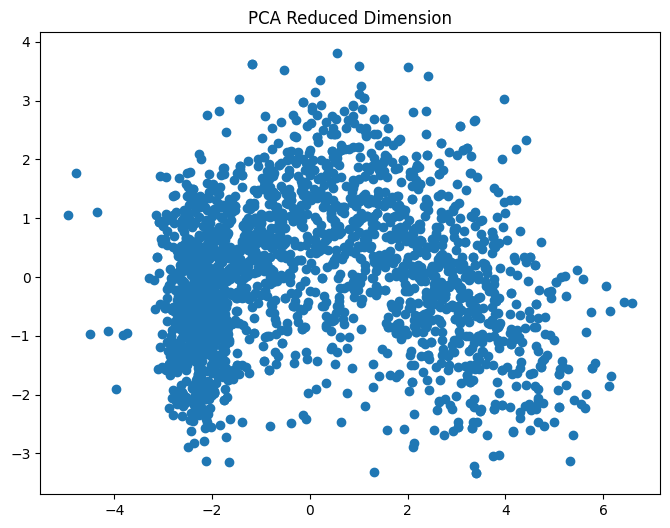

In [541]:
#A 2D Projection Of Data In The Reduced Dimension
x = df_pca["PC1"]
y = df_pca["PC2"]
#To plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.scatter(x,y, marker="o")
ax.set_title("PCA Reduced Dimension")
plt.show()

## Dendrogramme

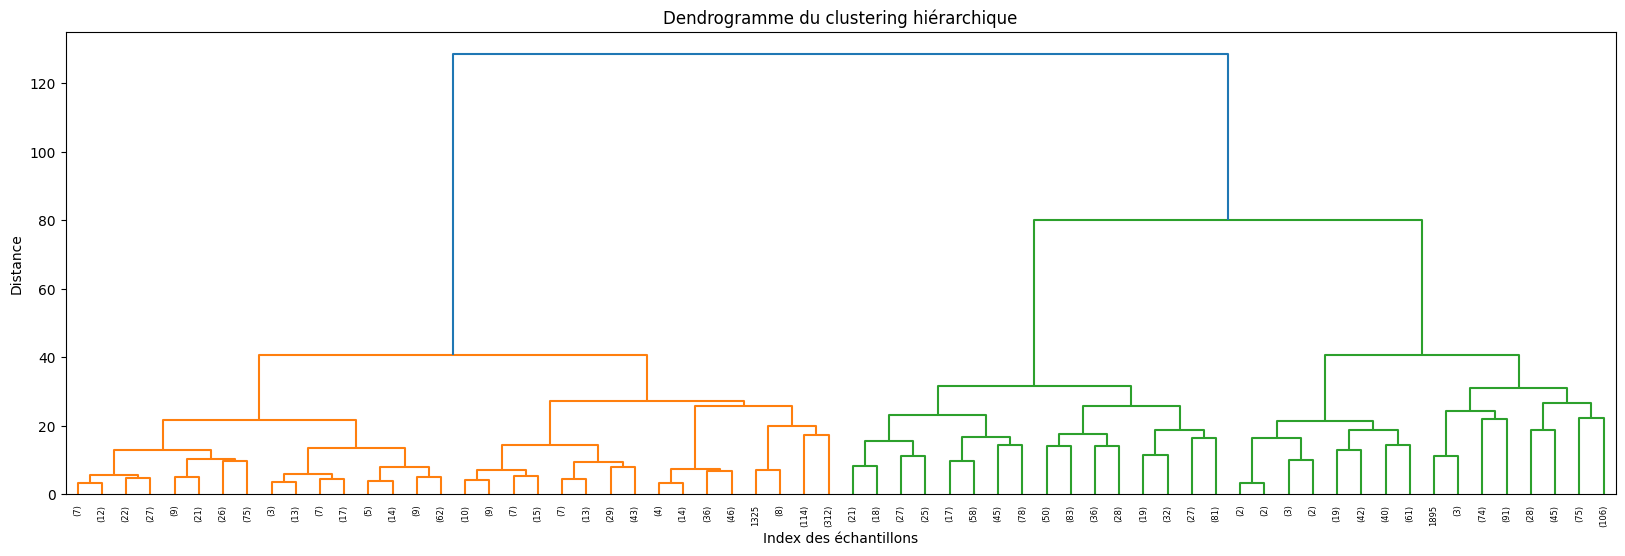

In [542]:
z = sch.linkage(data_scaled, method='ward')

# Tracer le dendrogramme
plt.figure(figsize=(20, 6))
sch.dendrogram(z, truncate_mode='level', p=5)
plt.title('Dendrogramme du clustering hiérarchique')
plt.xlabel('Index des échantillons')
plt.ylabel('Distance')
plt.show()

### Chercher le nombre optimal de cluster

For n_clusters = 2 The average silhouette_score is : 0.5344081427632503
For n_clusters = 3 The average silhouette_score is : 0.46683818329072474
For n_clusters = 4 The average silhouette_score is : 0.38846680020768254
For n_clusters = 5 The average silhouette_score is : 0.359702085852205
For n_clusters = 6 The average silhouette_score is : 0.3732049784618404


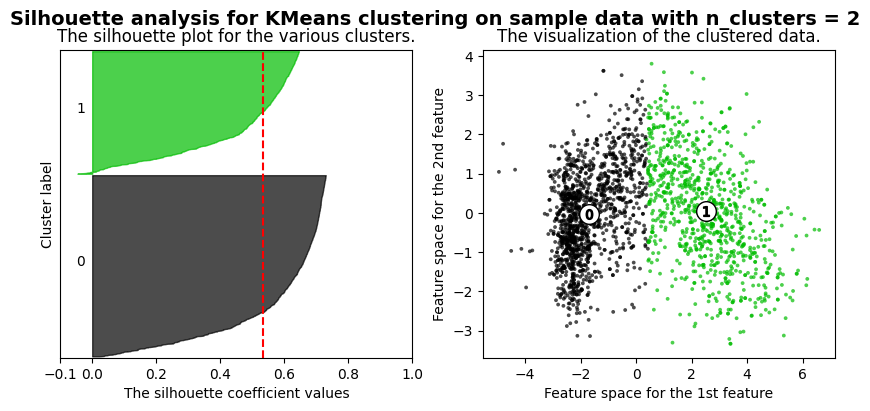

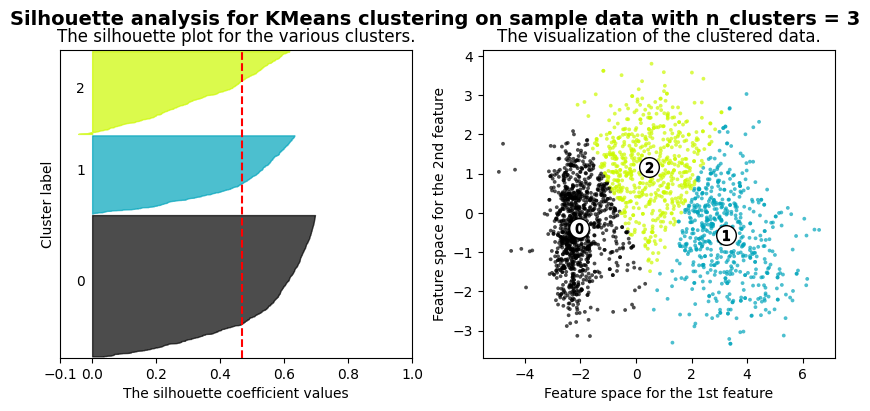

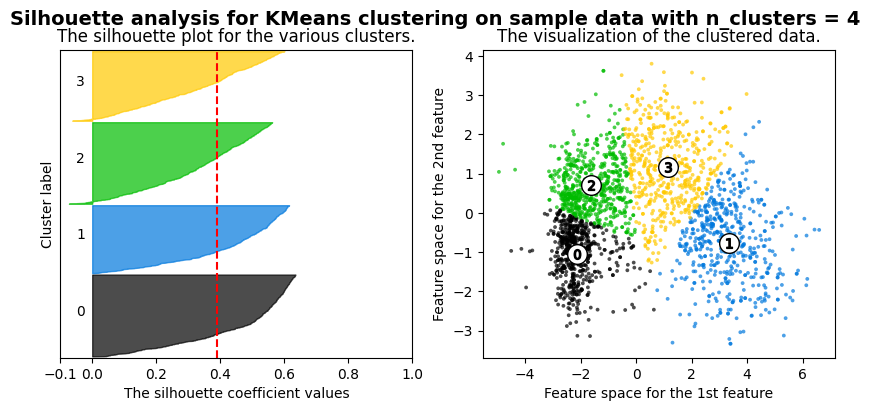

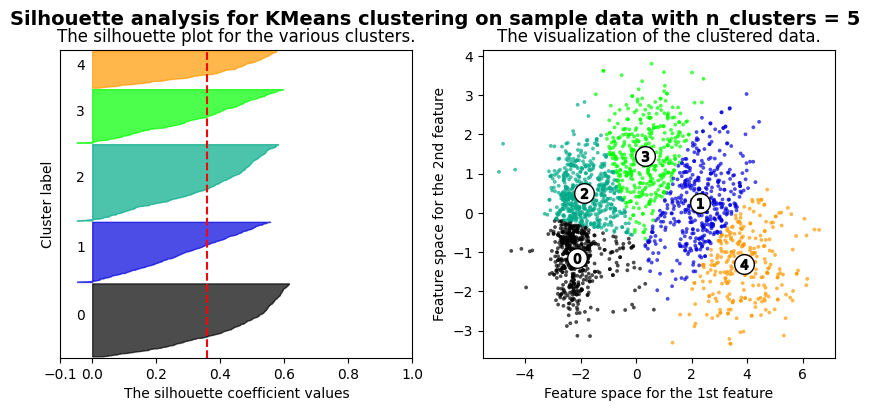

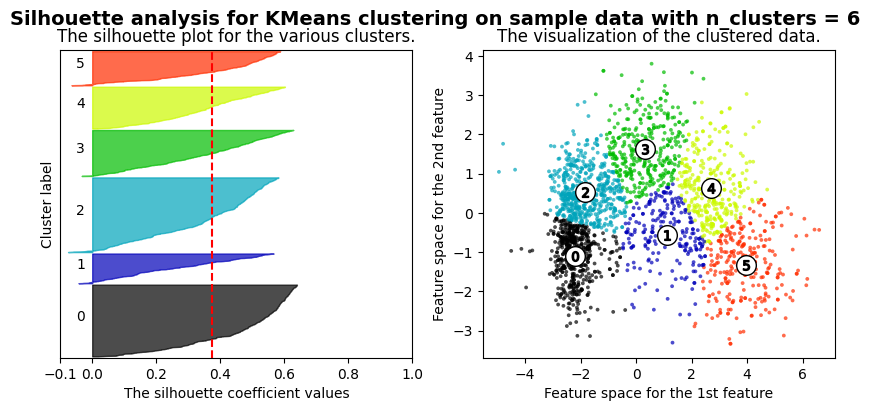

In [543]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(10, 4)


    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        df_pca['PC1'], df_pca['PC2'], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [544]:
# Initialisation K-Means++
cluster = KMeans(init ='k-means++', n_clusters= 3, random_state=42)
df['Cluster_No'] = cluster.fit_predict(df_pca)

# Récupérer les labels des clusters
labels_kmeans = cluster.labels_

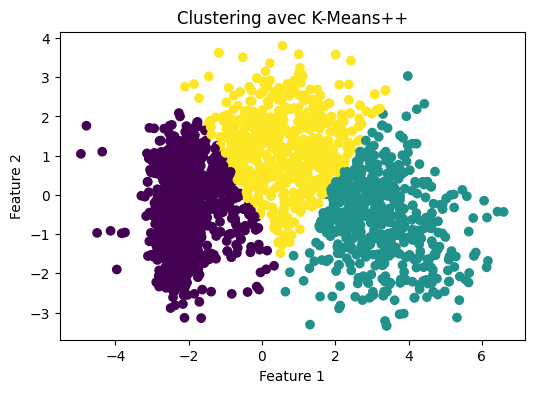

In [545]:
# Tracer les résultats du clustering
plt.figure(figsize=(6, 4))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=labels_kmeans) 

plt.title('Clustering avec K-Means++')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

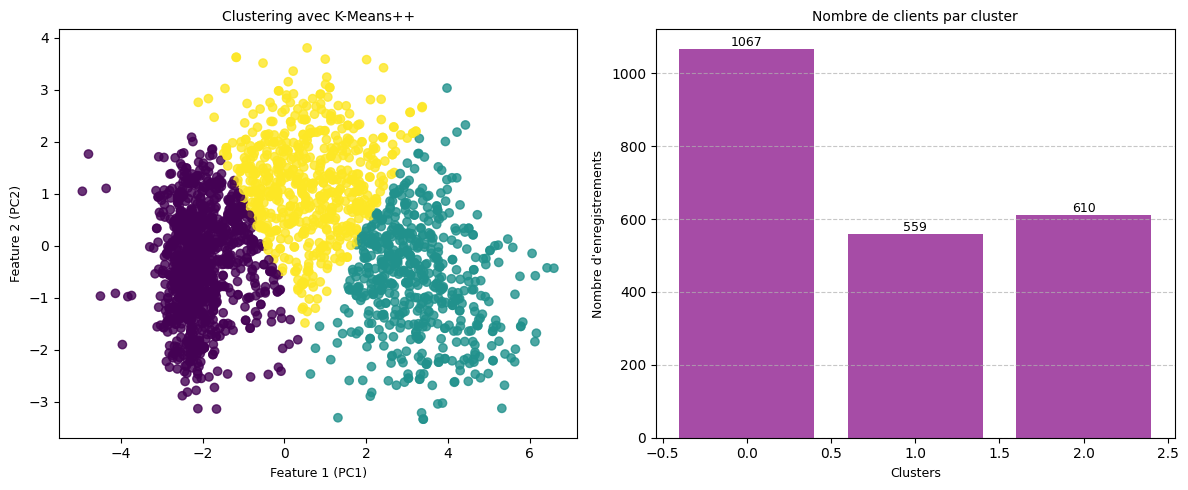

In [546]:
# Initialisation de la figure
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Une rangée, deux colonnes

# 1er sous-graphique : Nombre d'enregistrements par cluster (bar chart)
nombre_par_cluster = df['Cluster_No'].value_counts()
bars = axes[1].bar(nombre_par_cluster.index, nombre_par_cluster.values, color='purple', alpha=0.7)

axes[1].set_title("Nombre de clients par cluster", fontsize=10)
axes[1].set_xlabel("Clusters", fontsize=9)
axes[1].set_ylabel("Nombre d'enregistrements", fontsize=9)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Ajouter les valeurs au-dessus de chaque barre
for bar in bars:
    axes[1].text(
        bar.get_x() + bar.get_width() / 2,  # Position en x
        bar.get_height(),  # Position en y
        f'{int(bar.get_height())}',  # Texte à afficher
        ha='center', va='bottom', fontsize=9, color='black'
    )

# 2e sous-graphique : Scatter plot des clusters
axes[0].scatter(df_pca['PC1'], df_pca['PC2'], c=labels_kmeans, cmap='viridis', alpha=0.8)
axes[0].set_title("Clustering avec K-Means++", fontsize=10)
axes[0].set_xlabel("Feature 1 (PC1)", fontsize=9)
axes[0].set_ylabel("Feature 2 (PC2)", fontsize=9)

# Ajustement des espacements
plt.tight_layout()

# Afficher la figure combinée
plt.show()


In [547]:
mean_clusters= df.groupby('Cluster_No')[['Age', 'Income','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumWebVisitsMonth']].mean()

In [548]:
mean_clusters

Age        Income    MntWines  MntFruits  MntMeatProducts  \
Cluster_No                                                                    
0           52.100281  34693.298500   48.098407   5.186504        27.104030   
1           54.440072  75068.746869  571.490161  73.833631       450.740608   
2           60.959016  60958.796721  506.959016  19.583607       151.624590   

            MntFishProducts  MntSweetProducts  MntGoldProds  NumWebPurchases  \
Cluster_No                                                                     
0                  7.445173          5.287723     17.186504         2.249297   
1                104.803220         76.273703     83.093023         5.411449   
2                 28.527869         20.119672     55.014754         6.090164   

            NumWebVisitsMonth  
Cluster_No                     
0                    6.544517  
1                    2.989267  
2                    5.309836

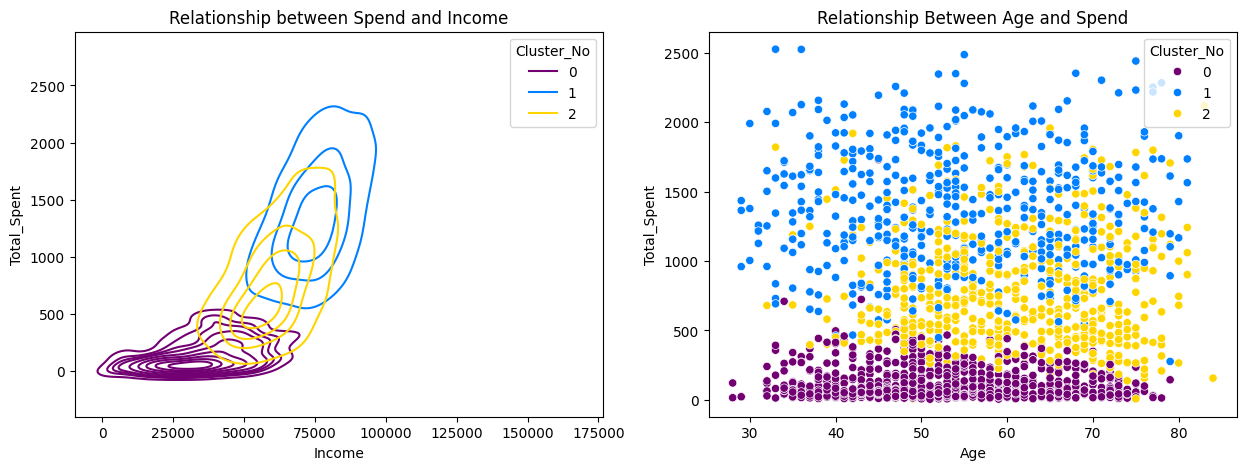

In [549]:
df["Total_Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.kdeplot(x=df['Income'], y= df["Total_Spent"], hue=df["Cluster_No"], palette= ["#720072", "#0080ff","#ffd500"], ax=axes[0]).set(title='Relationship between Spend and Income')
sns.scatterplot(x=df['Age'], y= df["Total_Spent"], hue=df["Cluster_No"], palette= ["#720072", "#0080ff","#ffd500"], ax=axes[1]).set(title='Relationship Between Age and Spend')
for ax in fig.axes:
    plt.sca(ax)
    # plt.xticks(rotation=90)

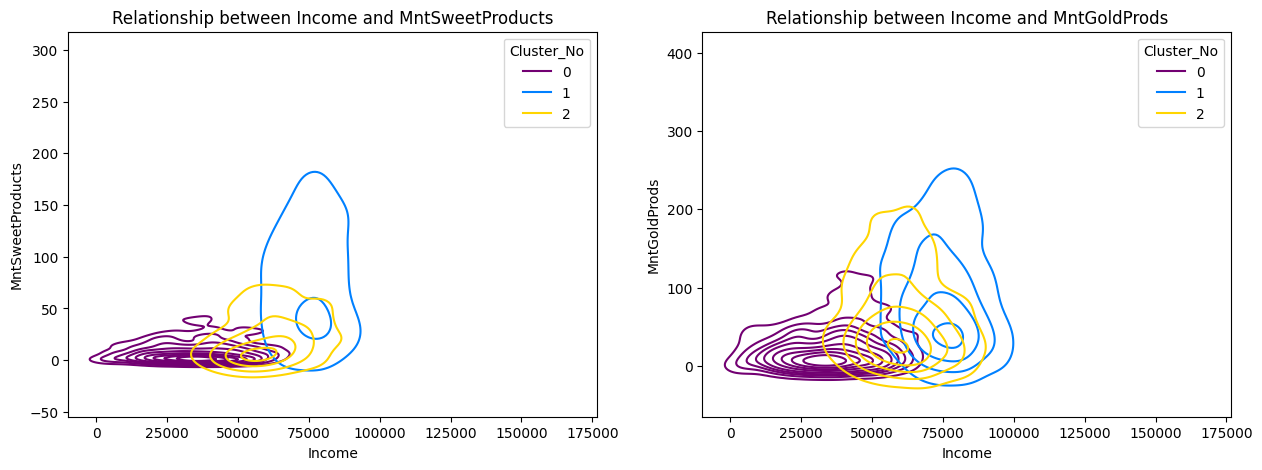

In [550]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.kdeplot(x=df['Income'], y= df["MntSweetProducts"], hue=df["Cluster_No"], palette= ["#720072", "#0080ff","#ffd500"], ax=axes[0]).set(title='Relationship between Income and MntSweetProducts')
sns.kdeplot(x=df['Income'], y= df["MntGoldProds"], hue=df["Cluster_No"], palette= ["#720072", "#0080ff","#ffd500"], ax=axes[1]).set(title='Relationship between Income and MntGoldProds')
for ax in fig.axes:
    plt.sca(ax)


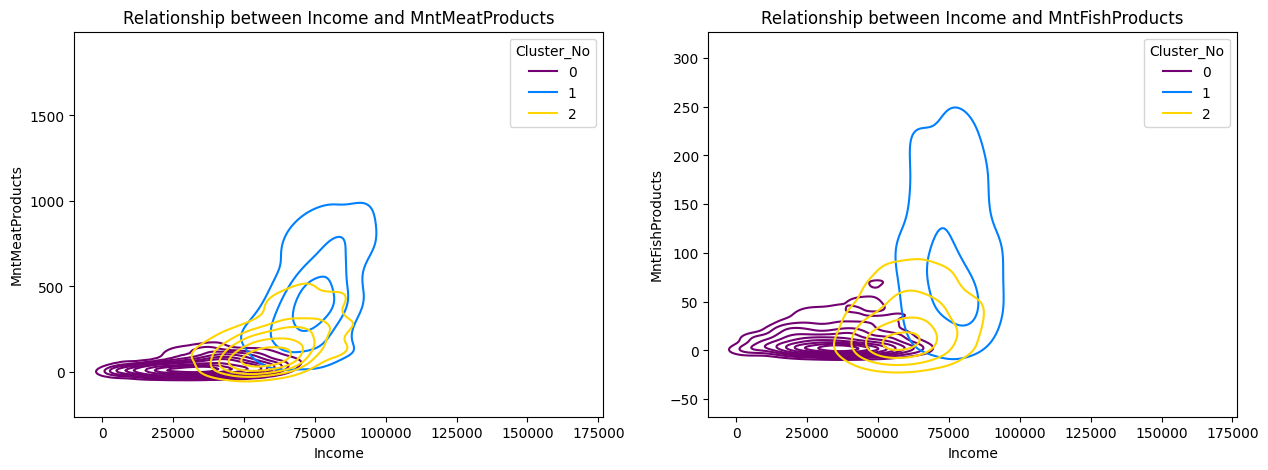

In [551]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.kdeplot(x=df['Income'], y= df["MntMeatProducts"], hue=df["Cluster_No"], palette= ["#720072", "#0080ff","#ffd500"], ax=axes[0]).set(title='Relationship between Income and MntMeatProducts')
sns.kdeplot(x=df['Income'], y= df["MntFishProducts"], hue=df["Cluster_No"], palette= ["#720072", "#0080ff","#ffd500"], ax=axes[1]).set(title='Relationship between Income and MntFishProducts')
for ax in fig.axes:
    plt.sca(ax)

## T-SNE : Réduction de dimensions non linéaire

In [552]:
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(data_scaled)

df_tsne = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])

In [553]:
df_tsne.head()

TSNE1      TSNE2
0  36.016876   1.399323
1 -31.553076  46.920353
2  25.876661   2.916471
3 -16.234461 -35.611404
4   1.101237  -5.127326

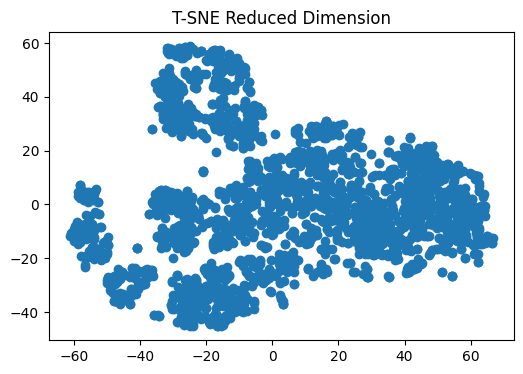

In [554]:
#A 3D Projection Of Data In The Reduced Dimension
x = df_tsne["TSNE1"]
y = df_tsne["TSNE2"]
#To plot
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
ax.scatter(x,y, marker="o")
ax.set_title("T-SNE Reduced Dimension")
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.42138872
For n_clusters = 3 The average silhouette_score is : 0.48819914
For n_clusters = 4 The average silhouette_score is : 0.4469921
For n_clusters = 5 The average silhouette_score is : 0.44972402
For n_clusters = 6 The average silhouette_score is : 0.4283439


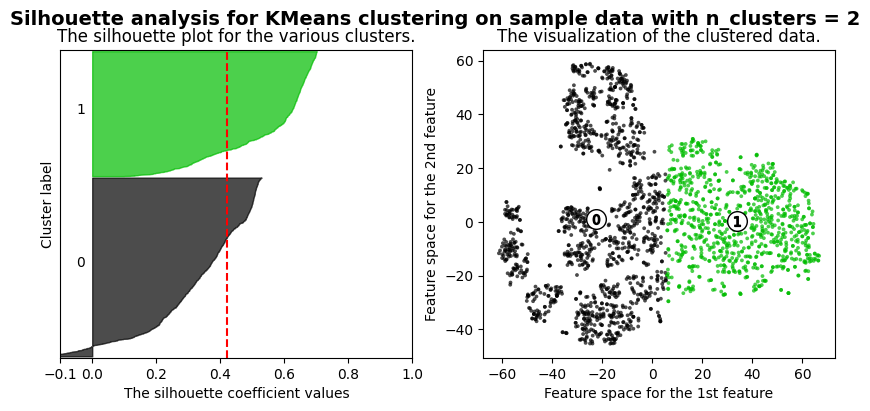

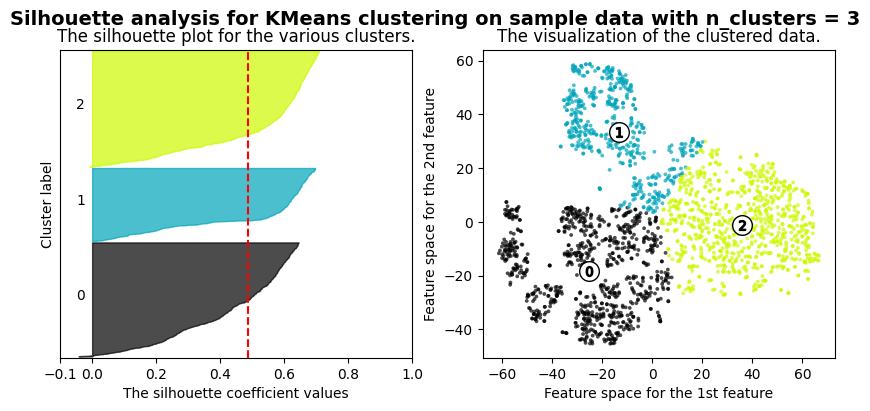

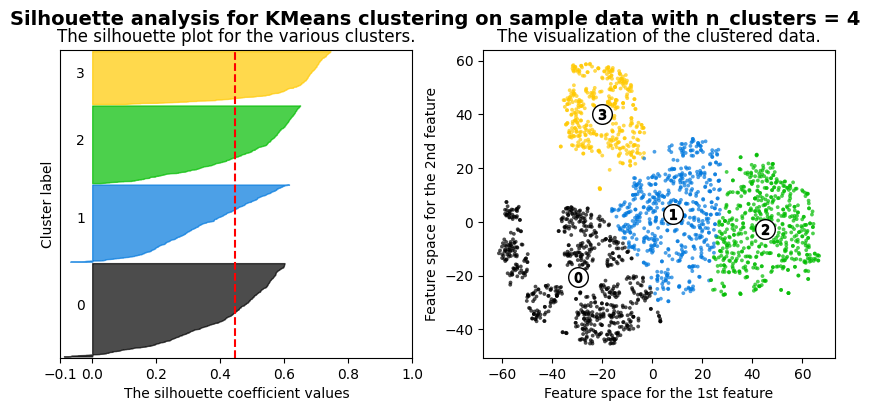

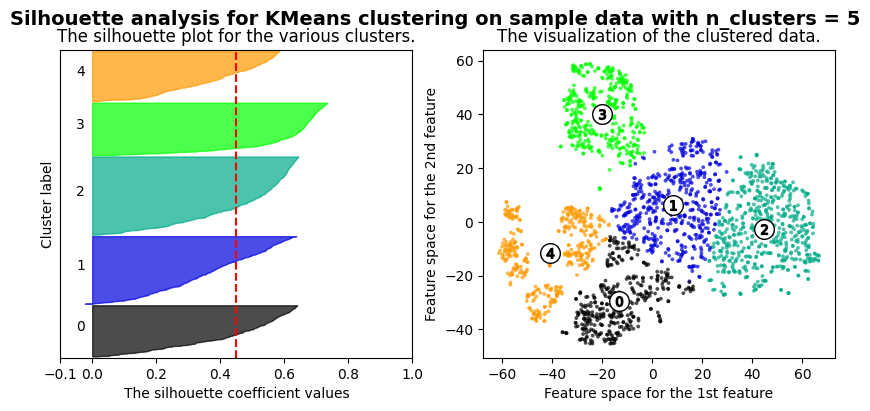

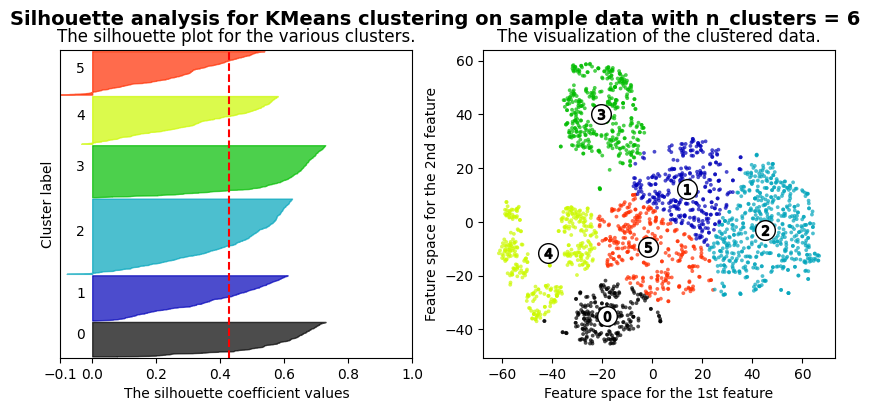

In [555]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)     # Create a subplot with 1 row and 2 columns
    fig.set_size_inches(10, 4)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df_tsne) + (n_clusters + 1) * 10]) # The (n_clusters+1)*10 is for inserting blank space between silhouette  plots of individual clusters, to demarcate them clearly.

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)  # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    cluster_labels = clusterer.fit_predict(df_tsne)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_tsne, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_tsne, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        df_tsne['TSNE1'], df_tsne['TSNE2'], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [556]:
# Initialisation K-Means++
kmeans_tsne = KMeans(n_clusters=3, init='k-means++', random_state=25) 
df['Cluster_No'] = kmeans_tsne.fit_predict(df_tsne)


# Récupérer les labels des clusters
labels_kmeans_tsne = kmeans_tsne.labels_

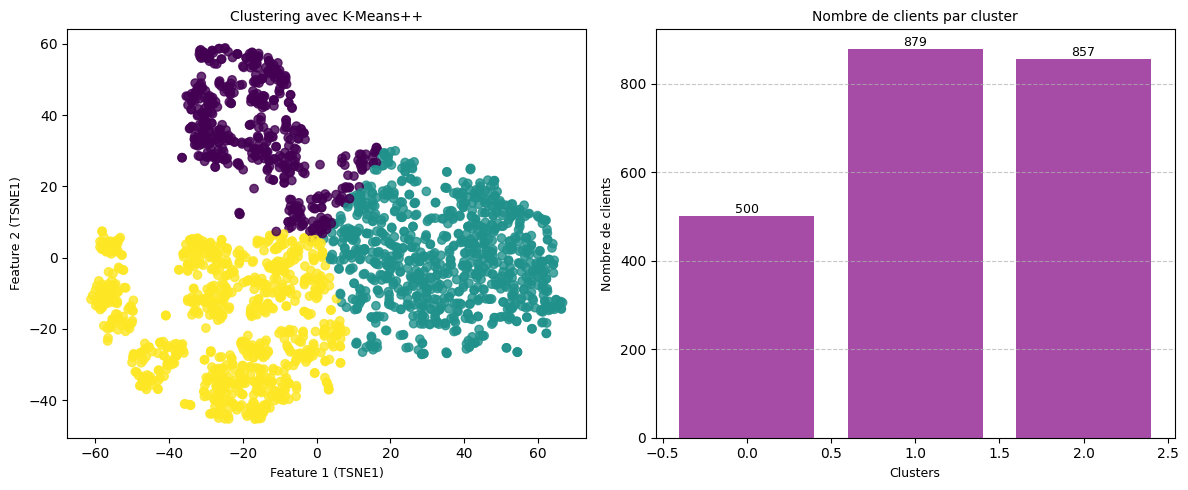

In [557]:
# Initialisation de la figure
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Une rangée, deux colonnes

# 1er sous-graphique : Nombre d'enregistrements par cluster (bar chart)
nombre_par_cluster = df['Cluster_No'].value_counts()
bars = axes[1].bar(nombre_par_cluster.index, nombre_par_cluster.values, color='purple', alpha=0.7)

axes[1].set_title("Nombre de clients par cluster", fontsize=10)
axes[1].set_xlabel("Clusters", fontsize=9)
axes[1].set_ylabel("Nombre de clients", fontsize=9)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Ajouter les valeurs au-dessus de chaque barre
for bar in bars:
    axes[1].text(
        bar.get_x() + bar.get_width() / 2,  # Position en x
        bar.get_height(),  # Position en y
        f'{int(bar.get_height())}',  # Texte à afficher
        ha='center', va='bottom', fontsize=9, color='black'
    )

# 2e sous-graphique : Scatter plot des clusters
axes[0].scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], c=labels_kmeans_tsne, cmap='viridis', alpha=0.8)
axes[0].set_title("Clustering avec K-Means++", fontsize=10)
axes[0].set_xlabel("Feature 1 (TSNE1)", fontsize=9)
axes[0].set_ylabel("Feature 2 (TSNE1)", fontsize=9)

# Ajustement des espacements
plt.tight_layout()

# Afficher la figure combinée
plt.show()


## DBSCAN

## DBSCAN (T-SNE)

### Trouver le paramètre epsilon

10.113583694160921


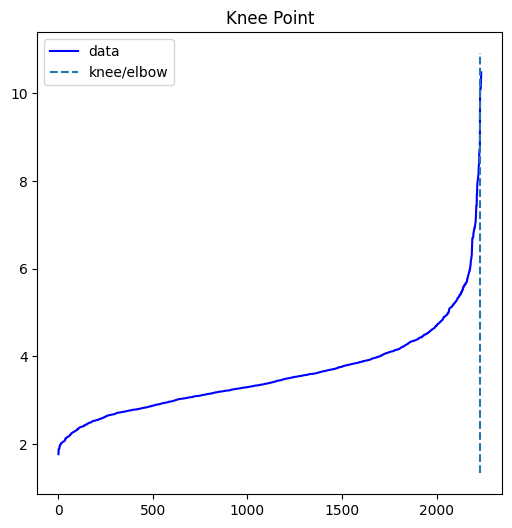

In [558]:
nbrs = NearestNeighbors(n_neighbors = 15).fit(df_tsne)

neigh_dist, neigh_ind = nbrs.kneighbors(df_tsne) # Find the k-neighbors of a point

# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

k_dist = sort_neigh_dist[:, 14]
# plt.plot(k_dist)
# plt.ylabel("k-NN distance")
# plt.xlabel("Sorted observations")
# plt.show()

kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)
kneedle.plot_knee()
plt.show()

In [559]:
dbscan_tsne = DBSCAN(eps = 10.1136 , min_samples = 14)
df['Cluster_No']  = dbscan_tsne.fit_predict(df_tsne)

# Récupérer les labels des clusters
labels_dbscan_tsne = dbscan_tsne.labels_

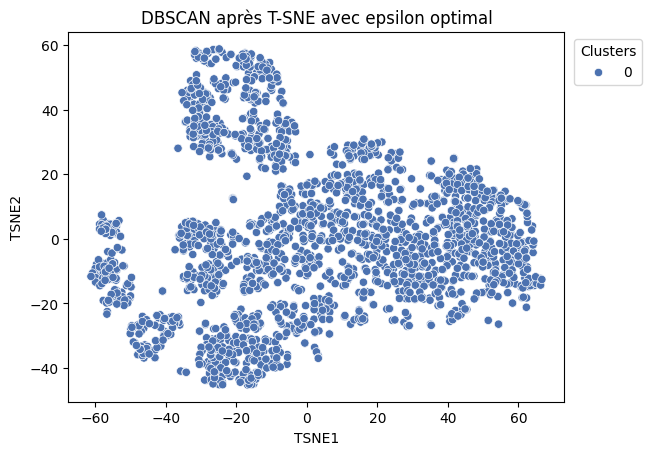

In [560]:
p = sns.scatterplot(data = df_tsne, x = "TSNE1", y = "TSNE2", hue = labels_dbscan_tsne, legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.title('DBSCAN après T-SNE avec epsilon optimal')
plt.show()

## DBSCAN (PCA)

1.3106524072610273


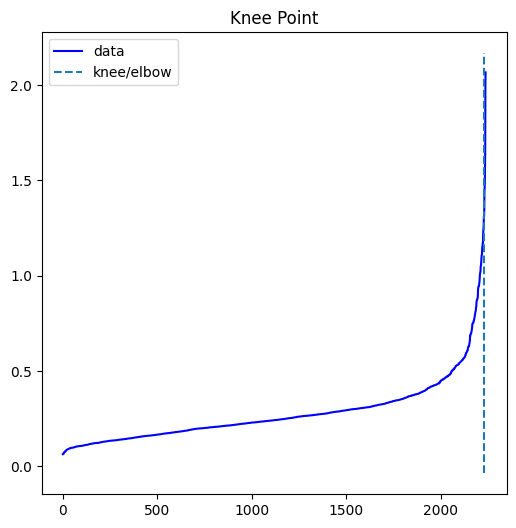

In [561]:
nbrs = NearestNeighbors(n_neighbors = 15).fit(df_pca)

neigh_dist, neigh_ind = nbrs.kneighbors(df_pca) # Find the k-neighbors of a point

# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

k_dist = sort_neigh_dist[:, 14]
# plt.plot(k_dist)
# plt.ylabel("k-NN distance")
# plt.xlabel("Sorted observations")
# plt.show()

kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)
kneedle.plot_knee()
plt.show()

In [562]:
dbscan_pca = DBSCAN(eps = 1.31054, min_samples = 14)
df['Cluster_No']  = dbscan_pca.fit_predict(df_pca)

# Récupérer les labels des clusters
labels_dbscan_pca = dbscan_pca.labels_

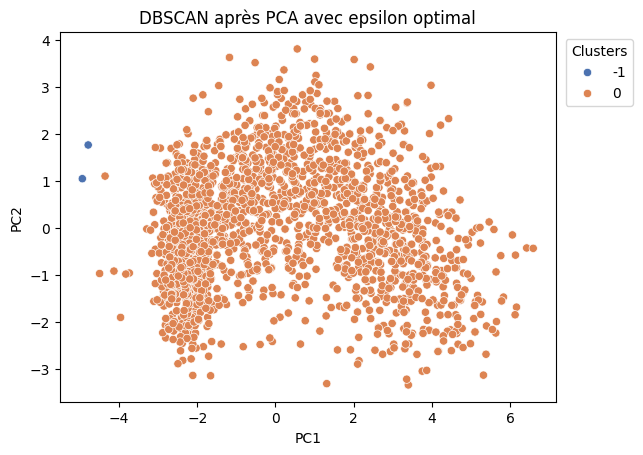

In [563]:
p = sns.scatterplot(data = df_pca, x = "PC1", y = "PC2", hue = labels_dbscan_pca, legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.title('DBSCAN après PCA avec epsilon optimal')
plt.show()

### DBSCAN sur les données originales


5.144449076255375


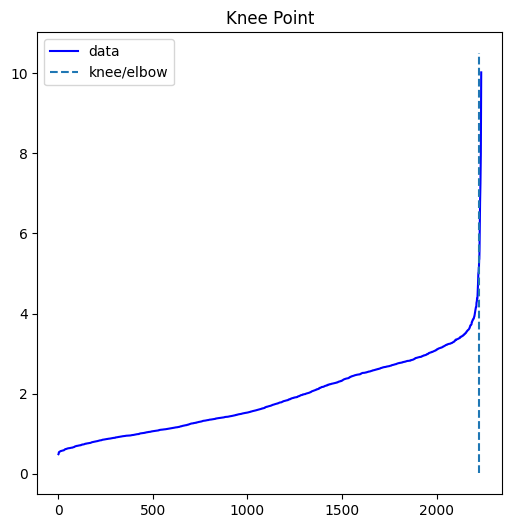

In [564]:
nbrs = NearestNeighbors(n_neighbors = 15).fit(data_scaled)

neigh_dist, neigh_ind = nbrs.kneighbors(data_scaled) # Find the k-neighbors of a point

# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

k_dist = sort_neigh_dist[:, 14]
# plt.plot(k_dist)
# plt.ylabel("k-NN distance")
# plt.xlabel("Sorted observations")
# plt.show()

kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)
kneedle.plot_knee()
plt.show()

In [565]:
dbscan_data = DBSCAN(eps = 5.1444, min_samples = 14)
df['Cluster_No']  = dbscan_data.fit_predict(data_scaled)

# Récupérer les labels des clusters
labels_dbscan_data = dbscan_data.labels_

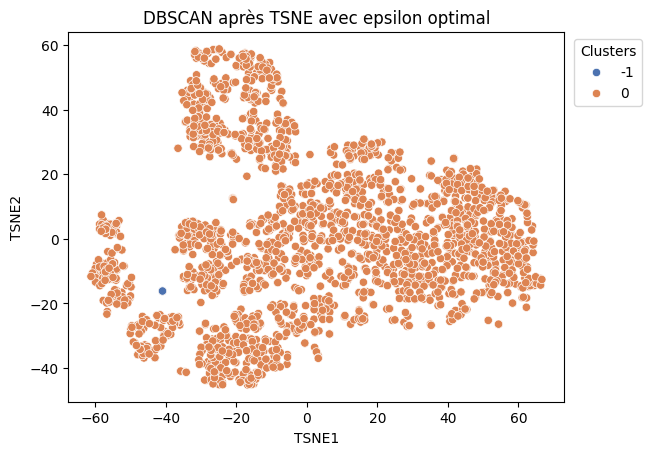

In [566]:
p = sns.scatterplot(data = df_tsne, x = "TSNE1", y = "TSNE2", hue = labels_dbscan_pca, legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.title('DBSCAN après TSNE avec epsilon optimal')
plt.show()

In [567]:
# Initialisation K-Means++
kmeans_tsne = KMeans(n_clusters=3, init='k-means++', random_state=25) 
df['Cluster_No'] = kmeans_tsne.fit_predict(df_tsne)


# Récupérer les labels des clusters
labels_kmeans_tsne = kmeans_tsne.labels_

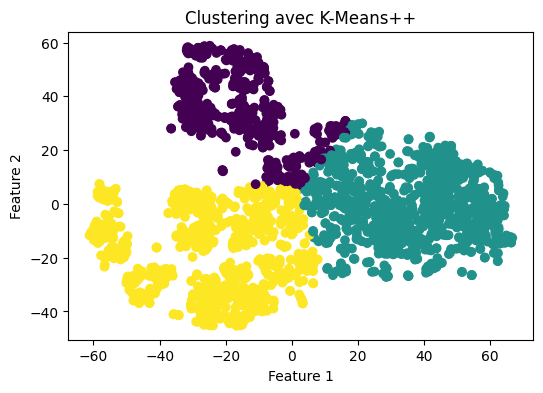

In [568]:
# Tracer les résultats du clustering
plt.figure(figsize=(6, 4))
plt.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], c=labels_kmeans_tsne) 
plt.title('Clustering avec K-Means++')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [569]:
mean_clusters= df.groupby('Cluster_No')[['Age', 'Income','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases','NumStorePurchases','NumWebVisitsMonth', 'Total_Kids']].mean()

In [570]:
# Réinitialiser l'index pour que 'Cluster_No' devienne une colonne
mean_clusters = mean_clusters.reset_index()


In [571]:
mean_clusters

Cluster_No        Age        Income    MntWines  MntFruits  \
0           0  59.698000  47060.970000  210.938000   5.376000   
1           1  56.193402  71098.502275  583.881684  56.824801   
2           2  51.301050  35169.167445   71.561260   7.136523   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0        50.480000         7.884000          5.806000     25.350000   
1       362.100114        80.865757         58.617747     75.682594   
2        34.829638        10.394399          7.145858     22.340723   

   NumWebPurchases  NumStorePurchases  NumWebVisitsMonth  Total_Kids  
0         3.752000           4.664000           6.406000    1.892000  
1         5.706485           8.526735           3.600683    0.481229  
2         2.623104           3.654609           6.446908    0.883314

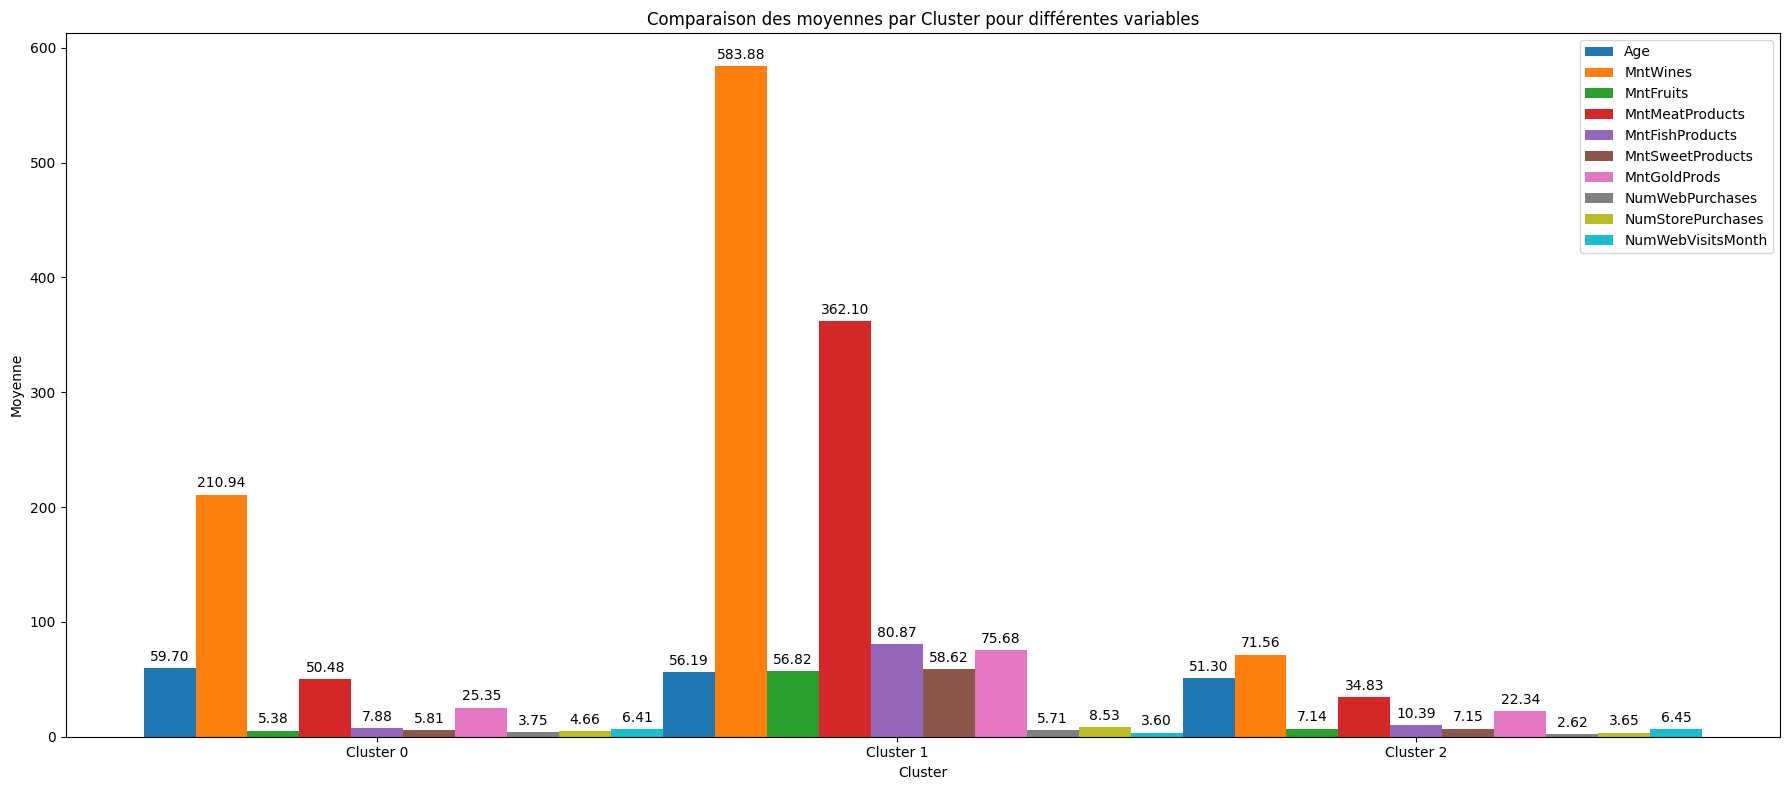

In [575]:
# Extraire les valeurs moyennes pour toutes les variables
columns = ['Age', 'MntWines', 'MntFruits', 'MntMeatProducts', 
           'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumStorePurchases','NumWebVisitsMonth']

# Créer un tableau des valeurs pour chaque variable
values = mean_clusters[columns].values

# Créer les positions des barres
x = np.arange(len(mean_clusters))  # Index des clusters
width = 0.1  # Largeur des barres

# Créer le plot
fig, ax = plt.subplots(figsize=(18, 8))

# Placer les barres côte à côte pour chaque variable
for i, col in enumerate(columns):
    rects = ax.bar(x + (i - 4) * width, values[:, i], width, label=col)

    # Ajouter les valeurs au-dessus des barres
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',  # Afficher la valeur avec 2 décimales
                    xy=(rect.get_x() + rect.get_width() / 2, height), 
                    xytext=(0, 3),  # Décaler légèrement pour ne pas superposer les valeurs avec les barres
                    textcoords="offset points",
                    ha='center', va='bottom')

# Ajouter des labels, titre et légende
ax.set_xlabel('Cluster')
ax.set_ylabel('Moyenne')
ax.set_title('Comparaison des moyennes par Cluster pour différentes variables')
ax.set_xticks(x)
ax.set_xticklabels([f'Cluster {i}' for i in range(len(mean_clusters))])
ax.legend()

# Afficher le plot
plt.tight_layout()
plt.show()


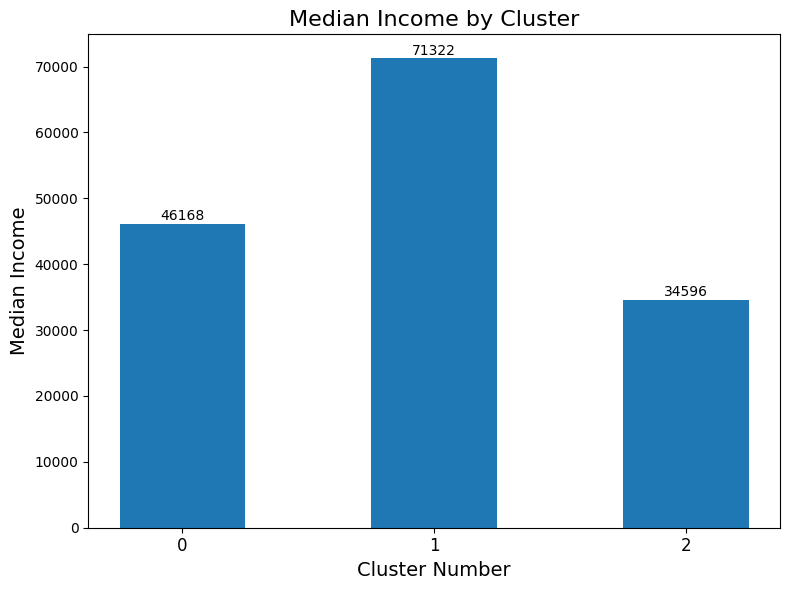

In [578]:
# Calculer la médiane de Income par Cluster_No
median_income = df.groupby("Cluster_No")["Income"].median()

# Configurer la figure
plt.figure(figsize=(8, 6))

# Tracer un graphique à barres
bars = plt.bar(median_income.index, median_income, width=0.5)

# Ajouter des valeurs numériques au-dessus des barres
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 500, f"{yval:.0f}", ha="center", fontsize=10)

# Ajouter des étiquettes, titre et légende
plt.xlabel("Cluster Number", fontsize=14)
plt.ylabel("Median Income", fontsize=14)
plt.title("Median Income by Cluster", fontsize=16)
plt.xticks(median_income.index, fontsize=12)

# Afficher le graphique
plt.tight_layout()
plt.show()

In [576]:
df

Education   Income  MntWines  MntFruits  MntMeatProducts  \
0             2  58138.0       635         88              546   
1             2  46344.0        11          1                6   
2             2  71613.0       426         49              127   
3             2  26646.0        11          4               20   
4             4  58293.0       173         43              118   
...         ...      ...       ...        ...              ...   
2235          2  61223.0       709         43              182   
2236          4  64014.0       406          0               30   
2237          2  56981.0       908         48              217   
2238          3  69245.0       428         30              214   
2239          4  52869.0        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumWebPurchases  \
0                 172                88            88                8   
1                   2                 1             6                1   
2                 111                21            42                8   
3                  10                 3             5                2   
4                  46                27            15                5   
...               ...               ...           ...              ...   
2235               42               118           247                9   
2236                0                 0             8                8   
2237               32                12            24                2   
2238               80                30            61                6   
2239                2                 1            21                3   

      NumStorePurchases  NumWebVisitsMonth  Total_Kids  Age  Cluster_No  \
0                     4                  7           0   67           1   
1                     2                  5           2   70           0   
2                    10                  4           0   59           1   
3                     4                  6           1   40           2   
4                     6                  5           1   43           2   
...                 ...                ...         ...  ...         ...   
2235                  4                  5           1   57           1   
2236                  5                  7           3   78           0   
2237                 13                  6           0   43           1   
2238                 10                  3           1   68           1   
2239                  4                  7           2   70           0   

      Total_Spent  
0            1617  
1              27  
2             776  
3              53  
4             422  
...           ...  
2235         1341  
2236          444  
2237         1241  
2238          843  
2239          172  

[2236 rows x 15 columns]

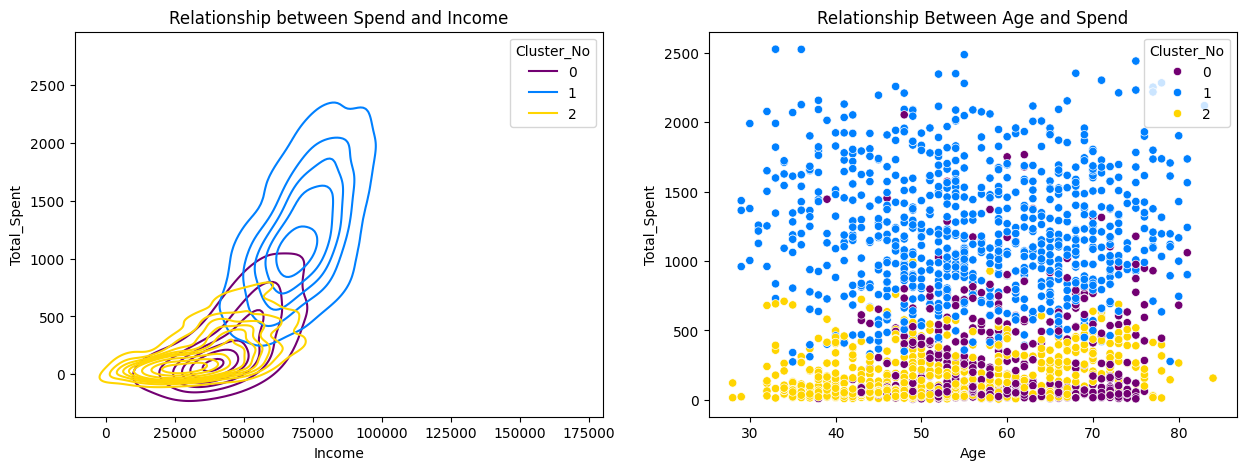

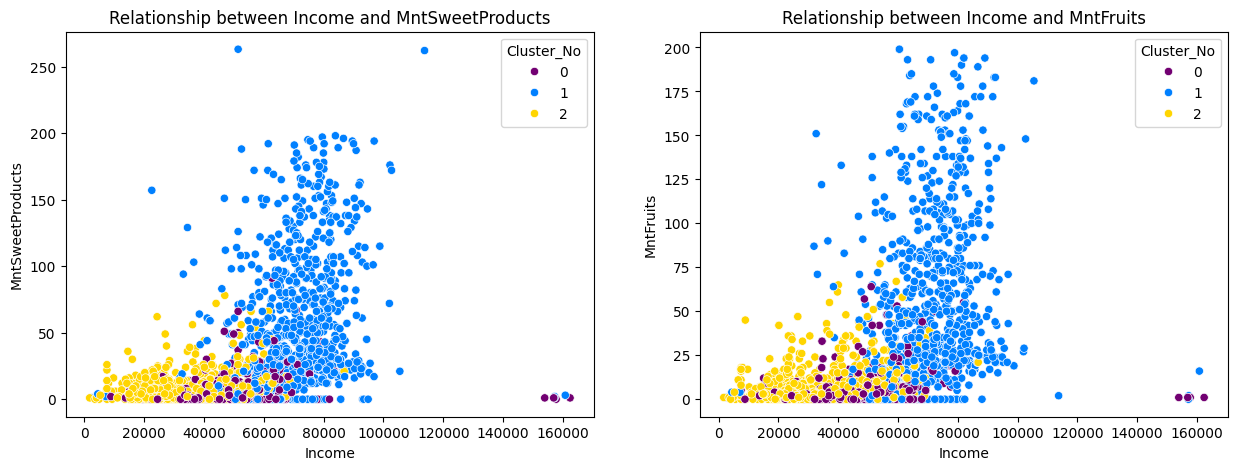

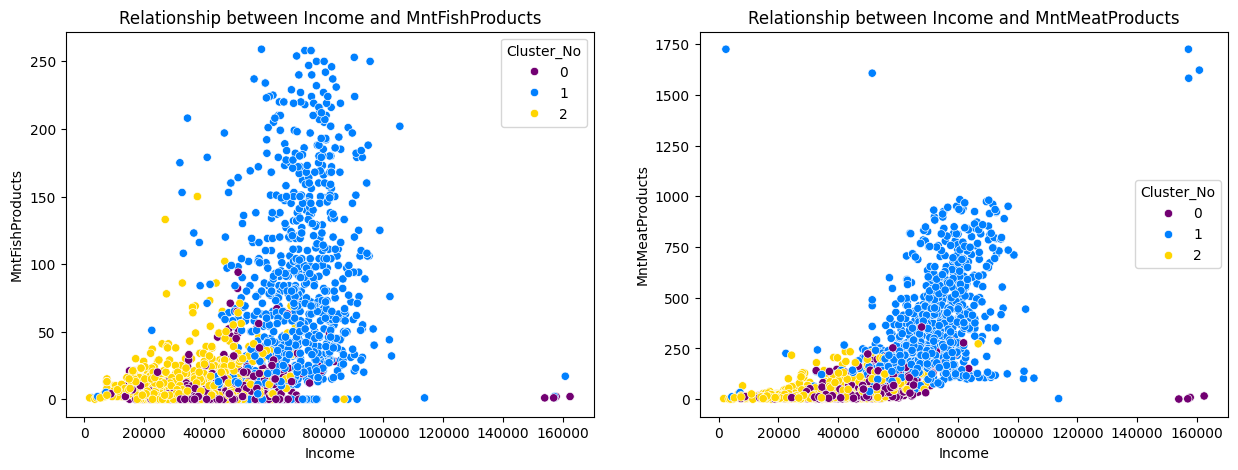

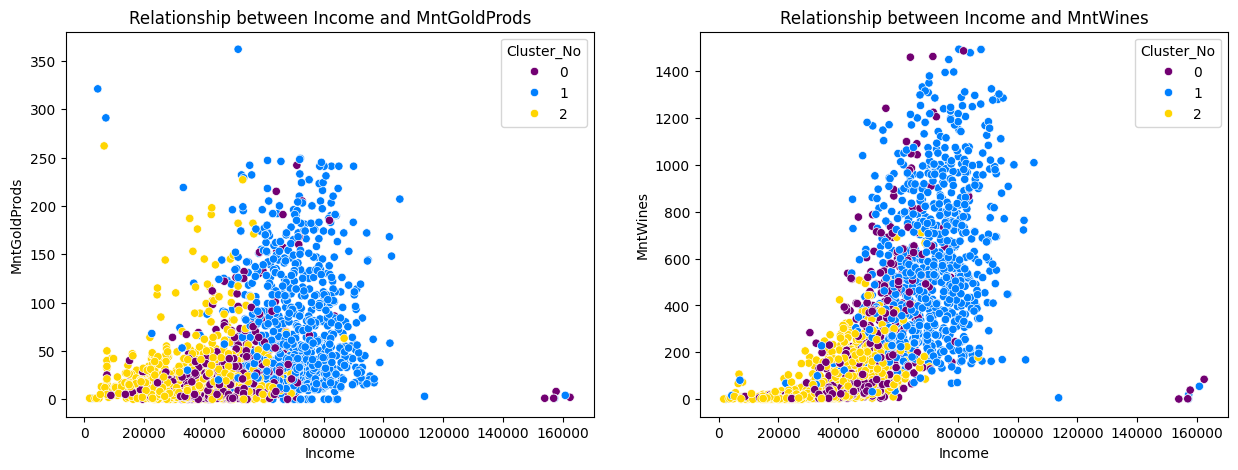

In [370]:
df["Total_Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.kdeplot(x=df['Income'], y= df["Total_Spent"], hue=df["Cluster_No"], palette= ["#720072", "#0080ff","#ffd500"], ax=axes[0]).set(title='Relationship between Spend and Income')
sns.scatterplot(x=df['Age'], y= df["Total_Spent"], hue=df["Cluster_No"], palette= ["#720072", "#0080ff","#ffd500"], ax=axes[1]).set(title='Relationship Between Age and Spend')
for ax in fig.axes:
    plt.sca(ax)
    # plt.xticks(rotation=90)

fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(x=df['Income'], y= df["MntSweetProducts"], hue=df["Cluster_No"], palette= ["#720072", "#0080ff","#ffd500"], ax=axes[0]).set(title='Relationship between Income and MntSweetProducts')
sns.scatterplot(x=df['Income'], y= df["MntFruits"], hue=df["Cluster_No"], palette= ["#720072", "#0080ff","#ffd500"], ax=axes[1]).set(title='Relationship between Income and MntFruits')
for ax in fig.axes:
    plt.sca(ax)


fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(x=df['Income'], y= df["MntFishProducts"], hue=df["Cluster_No"], palette= ["#720072", "#0080ff","#ffd500"], ax=axes[0]).set(title='Relationship between Income and MntFishProducts')
sns.scatterplot(x=df['Income'], y= df["MntMeatProducts"], hue=df["Cluster_No"], palette= ["#720072", "#0080ff","#ffd500"], ax=axes[1]).set(title='Relationship between Income and MntMeatProducts')
for ax in fig.axes:
    plt.sca(ax)

fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(x=df['Income'], y= df["MntGoldProds"], hue=df["Cluster_No"], palette= ["#720072", "#0080ff","#ffd500"], ax=axes[0]).set(title='Relationship between Income and MntGoldProds')
sns.scatterplot(x=df['Income'], y= df["MntWines"], hue=df["Cluster_No"], palette= ["#720072", "#0080ff","#ffd500"], ax=axes[1]).set(title='Relationship between Income and MntWines')
for ax in fig.axes:
    plt.sca(ax)

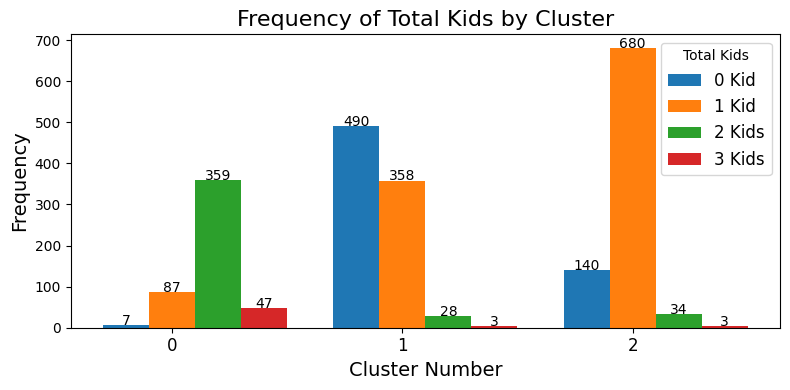

In [384]:
# Calculer les fréquences de Total_Kids par Cluster_No
frequencies = df.groupby(["Cluster_No", "Total_Kids"]).size().unstack(fill_value=0)

# Configurer la figure
plt.figure(figsize=(8, 4))

# Définir les positions des clusters et la largeur des barres
x = range(len(frequencies))
bar_width = 0.2

# Tracer les barres pour chaque valeur de Total_Kids
for i, kids in enumerate(frequencies.columns):
    bars = plt.bar(
        [pos + i * bar_width for pos in x],  # Positions décalées pour les barres
        frequencies[kids],                   # Fréquences correspondantes
        width=bar_width, 
        label=f"{kids} Kid{'s' if kids > 1 else ''}"
    )
    # Ajouter les valeurs numériques au-dessus de chaque barre
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval), ha="center", fontsize=10)

# Ajouter des étiquettes, titres et légende
plt.xticks([pos + bar_width for pos in x], frequencies.index, fontsize=12)
plt.xlabel("Cluster Number", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Frequency of Total Kids by Cluster", fontsize=16)
plt.legend(title="Total Kids", fontsize=12)

# Afficher le graphique
plt.tight_layout()
plt.show()
